# Graph Learning

In [52]:
%pylab inline
import pandas as pd
import pickle as pkl

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [53]:
from mat_adj import Adj , file

In [54]:
def selfN(x,B,C):
    return -B*x + C*tanh(x)

## Dynamics in general

We know that for any graph system, the node signals follow:

$$
 \frac{d \vec{x}}{dt} = M_0(\vec{x}) + diag(M_1(\vec{x}))A M_2(\vec{x}) 
$$

Using these dynamics, it should be theoretically possible to learn back the adjacency matrix of the network that produced the signals.   

In [61]:
Dynamics = { "R1": (lambda x: -1*x , lambda x: ones(len(x)) , lambda x: x/(1+x)) , "R2":(lambda x: -(x)**(0.4) , lambda x: ones(len(x))  , lambda x: (x**(0.2)/(1 + x**(0.2)))), "P":(lambda x: - x**(0.5) , lambda x: ones(len(x))  , lambda x: x**(0.2)) , "M":(lambda x: x(1- x*x) , lambda x: x , lambda x: x/(1+x)) , "E":(lambda x: -1*x , lambda x: x**(0.5) , lambda x: x**2) , "N":(selfN , lambda x: ones(len(x))  , lambda x: tanh(x)) }

In [62]:
Type = "R1"
M0 = Dynamics[Type][0]
M1 = Dynamics[Type][1]
M2 = Dynamics[Type][2]

In [70]:
N = 21
T = 1000
A_gt = pkl.load(open(file(N),"rb"))

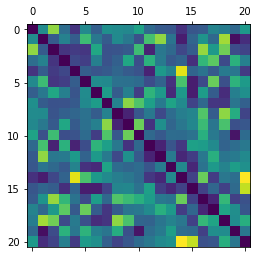

In [72]:
matshow(A_gt)

In [73]:
dt = 0.01
x0 = abs(randn(N,))
x0

array([1.20173713, 0.63936752, 0.41124103, 1.20061028, 0.91884876,
       1.3686655 , 0.89758971, 0.99016497, 1.74778882, 0.60603641,
       1.00156963, 0.6995641 , 0.81420799, 0.54130594, 0.99656527,
       0.75864455, 1.94441814, 0.0529711 , 0.61072297, 0.65220361,
       0.01843366])

In [74]:
x = x0
Traj = []

for i in range(T):
    Traj.append(x)
    x = x + (M0(x) + dot(diag(M1(x)), dot(A_gt,M2(x))))*dt

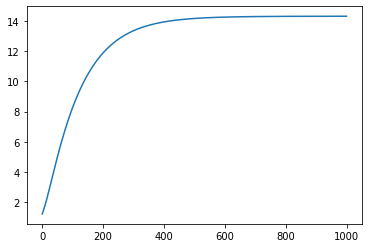

In [75]:
plot([(Traj[i])[0] for i in range(T)])

In [76]:
k = 4
samples = [Traj[k*i] for i in range(T//k)]
derivs = [(samples[i+1] - samples[i])/(k*dt) for i in range(T//k - 1)]

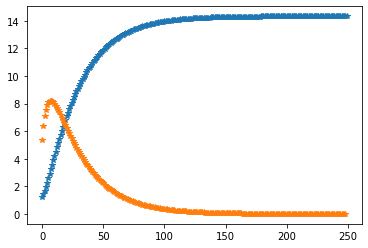

In [77]:
plot(array(samples)[:,0],"*")
plot([i for i in range(T//k - 1)], array(derivs)[:,0],"*")

In [79]:
whos

Variable   Type         Data/Info
---------------------------------
AA         DataFrame          0         1        <...>n\n[22 rows x 22 columns]
A_gt       ndarray      21x21: 441 elems, type `float64`, 3528 bytes
Adj        function     <function Adj at 0x7f3a1f83bd90>
Dynamics   dict         n=6
M0         function     <function <lambda> at 0x7f3a1d327d90>
M1         function     <function <lambda> at 0x7f3a1d327eb0>
M2         function     <function <lambda> at 0x7f3a1d327e20>
N          int          21
T          int          1000
Traj       list         n=1000
Type       str          R1
derivs     list         n=249
dt         float        0.01
file       function     <function file at 0x7f3a1f71ab90>
i          int          999
k          int          4
matlab     module       <module 'matlab' from '/h<...>site-packages/matlab.py'>
os         module       <module 'os' from '/usr/lib/python3.10/os.py'>
pd         module       <module 'pandas' from '/h<...>ages/pandas/__init__.p